In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm 
from salishsea_tools import viz_tools, visualisations
import matplotlib as mpl
import pandas as pd

In [2]:
meters_ds_PS = xr.open_dataset('PS_daily_m_freshwater.nc').drop_sel(time='2020-02-29T12:00:00.000000000')
prop_ds_PS = xr.open_dataset('PS_daily_prop_freshwater.nc')

In [3]:
meters_ds_PS_2019 = meters_ds_PS.sel(time=slice('2019-01-01', '2019-12-31'))
meters_ds_PS_2020 = meters_ds_PS.sel(time=slice('2020-01-01', '2020-12-31'))
meters_ds_PS_2021 = meters_ds_PS.sel(time=slice('2021-01-01', '2021-12-31'))
meters_ds_PS_2022 = meters_ds_PS.sel(time=slice('2022-01-01', '2022-12-31'))
meters_ds_PS_2023 = meters_ds_PS.sel(time=slice('2023-01-01', '2023-12-31'))

In [4]:
meters_ds_PS['time'] = meters_ds_PS['time'].dt.strftime('%m-%d')

In [5]:
meters_ds_PS_clim = meters_ds_PS.groupby('time').mean()

In [6]:
meters_ds_PS_2019_mean = meters_ds_PS_2019.mean(dim='time')
meters_ds_PS_2020_mean = meters_ds_PS_2020.mean(dim='time')
meters_ds_PS_2021_mean = meters_ds_PS_2021.mean(dim='time')
meters_ds_PS_2022_mean = meters_ds_PS_2022.mean(dim='time')
meters_ds_PS_2023_mean = meters_ds_PS_2023.mean(dim='time')

In [7]:
prop_ds_PS_2019 = prop_ds_PS.sel(time=slice('2019-01-01', '2019-12-31'))
prop_ds_PS_2020 = prop_ds_PS.sel(time=slice('2020-01-01', '2020-12-31')).drop_sel(time='2020-02-29T12:00:00.000000000')
prop_ds_PS_2021 = prop_ds_PS.sel(time=slice('2021-01-01', '2021-12-31'))
prop_ds_PS_2022 = prop_ds_PS.sel(time=slice('2022-01-01', '2022-12-31'))
prop_ds_PS_2023 = prop_ds_PS.sel(time=slice('2023-01-01', '2023-12-31'))

In [8]:
river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_vol_ts_all12_20190101_20231231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108 = river_flows_202108[river_flows_202108['date'] != pd.to_datetime('2020-02-29')]
river_flows_202108['month-day'] = river_flows_202108['date'].dt.strftime('%m-%d')
daily_clim_202108 = river_flows_202108.groupby(['month-day']).mean(numeric_only=True).reset_index()

In [9]:
river_flows_2019 = river_flows_202108[river_flows_202108['date'].dt.year == 2019]
river_flows_2020 = river_flows_202108[river_flows_202108['date'].dt.year == 2020]
river_flows_2021 = river_flows_202108[river_flows_202108['date'].dt.year == 2021]
river_flows_2022 = river_flows_202108[river_flows_202108['date'].dt.year == 2022]
river_flows_2023 = river_flows_202108[river_flows_202108['date'].dt.year == 2023]

In [10]:
river_dict = {'fraser_river': 'Fraser [m^3/s]', 'nooksack_river': 'Nooksack [m^3/s]', 'skagit_river': 'Skagit1 [m^3/s]', 'snohomish_river': 'SnohomishAllenQuilceda [m^3/s]', \
              'nisqually_river': 'NisquallyMcAllister [m^3/s]', 'elwha_river': 'Elwha [m^3/s]', 'cowichan_river': 'Cowichan1 [m^3/s]', \
              'nanaimo_river': 'Nanaimo1 [m^3/s]', 'puntledge_river': 'Puntledge [m^3/s]', 'salmon_river': 'SalmonSayward [m^3/s]', 'homathko_river': 'Homathko [m^3/s]', \
              'squamish_river': 'Squamish [m^3/s]'}

In [35]:
year_markers = ['o', 's', '^', 'D', 'x']
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]
# year_colors1 = ['#040071', '#2E3958', '#57723F', '#80AB26', '#A9E30C']
# year_colors1 = ['#040071', '#3C0358', '#74063E', '#AC0925', '#E30B0B']
year_colors1 = ['#E30B0B', '#AC0925', '#74063E', '#3C0358', '#040071']

rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']
colors_list8 = rainbow_bright + rainbow_muted

In [12]:
def plot_river_years(riv_key, ax1, ax2):  # plots all years on top of each other to look at inter-annual comparisons
    # fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    # fig.suptitle(riv_key)

    ax1.plot(meters_ds_PS_2019['time'].dt.strftime('%m-%d'), meters_ds_PS_2019[riv_key], label='2019', linestyle=year_lines[0], color='k', markersize=3)
    ax1.plot(meters_ds_PS_2020['time'].dt.strftime('%m-%d'), meters_ds_PS_2020[riv_key], label='2020', linestyle=year_lines[1], color='k', markersize=3)
    ax1.plot(meters_ds_PS_2021['time'].dt.strftime('%m-%d'), meters_ds_PS_2021[riv_key], label='2021', linestyle=year_lines[2], color='k', markersize=3)
    ax1.plot(meters_ds_PS_2022['time'].dt.strftime('%m-%d'), meters_ds_PS_2022[riv_key], label='2022', linestyle=year_lines[3], color='k', markersize=3)
    ax1.plot(meters_ds_PS_2023['time'].dt.strftime('%m-%d'), meters_ds_PS_2023[riv_key], label='2023', linestyle=year_lines[4], color='k', markersize=3)
    # ax1.legend()
    # ax1.set_title('meters of freshwater')
    ax1.set_ylabel(r'FWC [$m$]')
    # ax1.set_xticks(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01', '10-01', '11-01', '12-01', '12-31'])
    ax1.set_xticks(['01-01', '03-01', '05-01', '07-01', '09-01', '11-01', '12-31'])
    ax1.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax2.plot(prop_ds_PS_2019['time'].dt.strftime('%m-%d'), prop_ds_PS_2019[riv_key], label='2019', linestyle=year_lines[0], color='k', markersize=3)
    ax2.plot(prop_ds_PS_2020['time'].dt.strftime('%m-%d'), prop_ds_PS_2020[riv_key], label='2020', linestyle=year_lines[1], color='k', markersize=3)
    ax2.plot(prop_ds_PS_2021['time'].dt.strftime('%m-%d'), prop_ds_PS_2021[riv_key], label='2021', linestyle=year_lines[2], color='k', markersize=3)
    ax2.plot(prop_ds_PS_2022['time'].dt.strftime('%m-%d'), prop_ds_PS_2022[riv_key], label='2022', linestyle=year_lines[3], color='k', markersize=3)
    ax2.plot(prop_ds_PS_2023['time'].dt.strftime('%m-%d'), prop_ds_PS_2023[riv_key], label='2023', linestyle=year_lines[4], color='k', markersize=3)
    # ax2.set_title('proportion of freshwater')
    ax2.set_ylabel(r'% FW Contr.')
    ax2.set_xticks(['01-01', '03-01', '05-01', '07-01', '09-01', '11-01', '12-31'])
    ax2.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax2.text(0.95, 1.2, r'{}'.format(riv_key.split('_')[0].capitalize()), transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor=colors_df8[riv_key][0], alpha=0.5, edgecolor=colors_df8[riv_key][0]))

In [23]:
def plot_river_hydro(riv_key, ax1, ax2):  # plots all years on top of each other to look at inter-annual comparisons
    # fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    # fig.suptitle(riv_key)

    ax1.plot(meters_ds_PS_2019['time'].dt.strftime('%m-%d'), meters_ds_PS_2019[riv_key], label='2019', linestyle=year_lines[0], color=year_colors1[0], markersize=3, alpha=1)
    ax1.plot(meters_ds_PS_2020['time'].dt.strftime('%m-%d'), meters_ds_PS_2020[riv_key], label='2020', linestyle=year_lines[1], color=year_colors1[1], markersize=3, alpha=1)
    ax1.plot(meters_ds_PS_2021['time'].dt.strftime('%m-%d'), meters_ds_PS_2021[riv_key], label='2021', linestyle=year_lines[2], color=year_colors1[2], markersize=3, alpha=1)
    ax1.plot(meters_ds_PS_2022['time'].dt.strftime('%m-%d'), meters_ds_PS_2022[riv_key], label='2022', linestyle=year_lines[3], color=year_colors1[3], markersize=3, alpha=1)
    ax1.plot(meters_ds_PS_2023['time'].dt.strftime('%m-%d'), meters_ds_PS_2023[riv_key], label='2023', linestyle=year_lines[4], color=year_colors1[4], markersize=3, alpha=1)
    ax1.plot(meters_ds_PS_clim['time'], meters_ds_PS_clim[riv_key], label='mean', linestyle='-', color='k', markersize=3)
    ax1.set_ylabel(r'FWC [$m$]')
    ax1.set_xticks(['01-01', '03-01', '05-01', '07-01', '09-01', '11-01', '12-31'])
    ax1.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax1.grid(axis='x', color='#737373', linestyle=(0, (1, 10)))
    ax1.set_xlim(['01-01', '12-31'])

    ax2.plot(river_flows_2019['month-day'], river_flows_2019[river_dict[riv_key]], label='2019', linestyle=year_lines[0], color=year_colors1[0], markersize=3, alpha=1)
    ax2.plot(river_flows_2020['month-day'], river_flows_2020[river_dict[riv_key]], label='2020', linestyle=year_lines[1], color=year_colors1[1], markersize=3, alpha=1)
    ax2.plot(river_flows_2021['month-day'], river_flows_2021[river_dict[riv_key]], label='2021', linestyle=year_lines[2], color=year_colors1[2], markersize=3, alpha=1)
    ax2.plot(river_flows_2022['month-day'], river_flows_2022[river_dict[riv_key]], label='2022', linestyle=year_lines[3], color=year_colors1[3], markersize=3, alpha=1)
    ax2.plot(river_flows_2023['month-day'], river_flows_2023[river_dict[riv_key]], label='2023', linestyle=year_lines[4], color=year_colors1[4], markersize=3, alpha=1)
    ax2.plot(daily_clim_202108['month-day'], daily_clim_202108[river_dict[riv_key]], label='mean', linestyle='-', color='k', markersize=3)
    ax2.set_ylabel(r'Flow [$m^3/s$]')
    ax2.set_xticks(['01-01', '03-01', '05-01', '07-01', '09-01', '11-01', '12-31'])
    ax2.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax2.grid(axis='x', color='#737373', linestyle=(0, (1, 10)))
    ax2.text(0.95, 1.16, r'{}'.format(riv_key.split('_')[0].capitalize()), transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor=colors_df8[riv_key][0], alpha=0.5, edgecolor=colors_df8[riv_key][0]))

In [14]:
river_keys = list(meters_ds_PS_2019.data_vars.keys())
colors_dict8 = dict(zip(river_keys, colors_list8))
colors_df8 = pd.DataFrame([colors_dict8])

In [15]:
variable_name = river_keys[0]

# Extract values for each year
value_2019 = meters_ds_PS_2019_mean[variable_name].values.item()
value_2020 = meters_ds_PS_2020_mean[variable_name].values.item()
value_2021 = meters_ds_PS_2021_mean[variable_name].values.item()
value_2022 = meters_ds_PS_2022_mean[variable_name].values.item()
value_2023 = meters_ds_PS_2023_mean[variable_name].values.item()

# Create a DataFrame
data = {
    '2019': value_2019,
    '2020': value_2020,
    '2021': value_2021,
    '2022': value_2022,
    '2023': value_2023,
}

df_means = pd.DataFrame(data, index=[variable_name]).T
print(variable_name)

nooksack_river


In [16]:
for river_key in river_keys[1:]:
    variable_name = river_key

    # Extract values for each year
    value_2019 = meters_ds_PS_2019_mean[variable_name].values.item()
    value_2020 = meters_ds_PS_2020_mean[variable_name].values.item()
    value_2021 = meters_ds_PS_2021_mean[variable_name].values.item()
    value_2022 = meters_ds_PS_2022_mean[variable_name].values.item()
    value_2023 = meters_ds_PS_2023_mean[variable_name].values.item()

    # Create a DataFrame
    data = {
        '2019': value_2019,
        '2020': value_2020,
        '2021': value_2021,
        '2022': value_2022,
        '2023': value_2023,
    }

    df = pd.DataFrame(data, index=[variable_name]).T
    df_means = pd.concat([df_means, df], axis=1)

In [17]:
# df_means.columns = df_means.columns.str.split('_').str[0].str.capitalize()
colors_dict8 = dict(zip(df_means.columns, colors_list8))
colors_df8 = pd.DataFrame([colors_dict8])
df_sorted = df_means.sum(axis=0).sort_values(ascending=False)
order = df_sorted.keys()
order

Index(['other_rivers', 'fraser_river', 'snohomish_river', 'nisqually_river',
       'skagit_river', 'squamish_river', 'homathko_river', 'elwha_river',
       'puntledge_river', 'nooksack_river', 'cowichan_river', 'nanaimo_river',
       'salmon_river'],
      dtype='object')

In [18]:
# fig, ax = plt.subplots(7, 2, figsize=(8.5, 11), sharex=True)
# fig.tight_layout(pad=2)

# plot_river_years(order[0], ax[0,0], ax[0,1])
# plot_river_years(order[1], ax[1,0], ax[1,1])
# plot_river_years(order[2], ax[2,0], ax[2,1])
# plot_river_years(order[3], ax[3,0], ax[3,1])
# plot_river_years(order[4], ax[4,0], ax[4,1])
# plot_river_years(order[5], ax[5,0], ax[5,1])
# plot_river_years(order[6], ax[6,0], ax[6,1])

# ax[0,1].legend(loc='center left', bbox_to_anchor=(-1, 1.2), ncol=5)

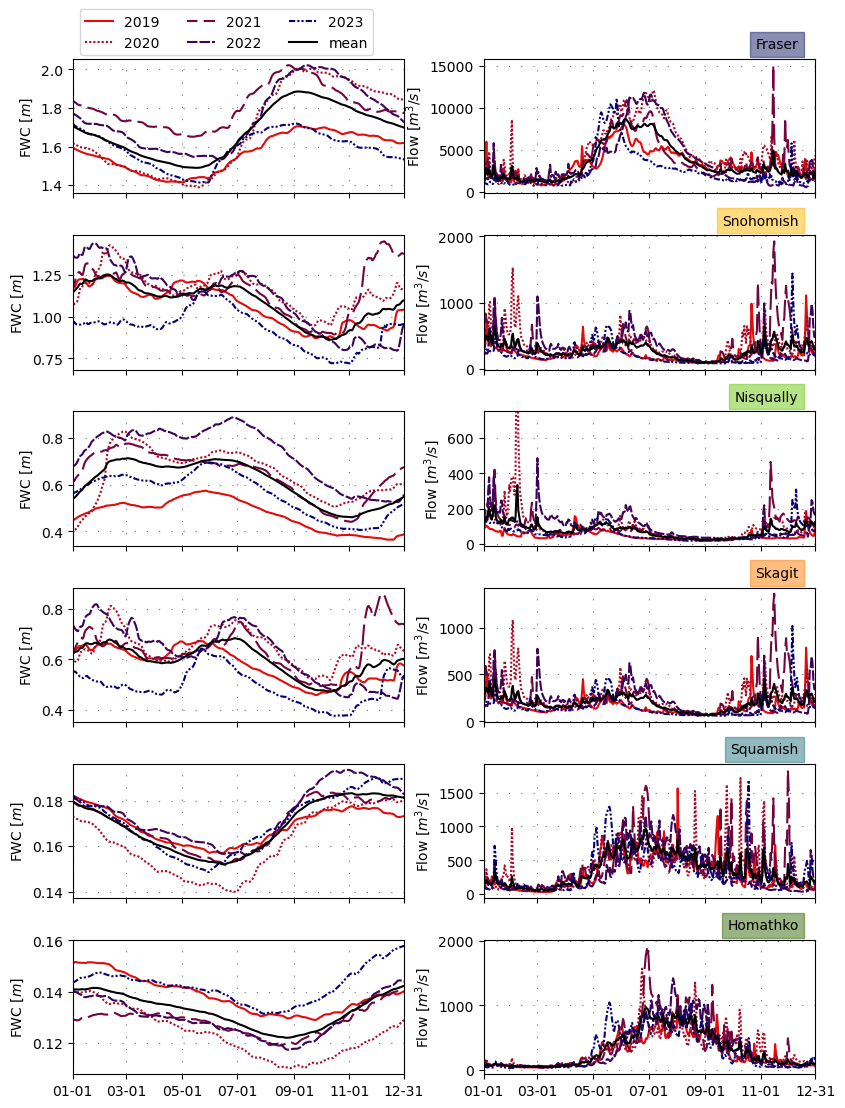

In [36]:
fig, ax = plt.subplots(6, 2, figsize=(8.5, 11), sharex=True)
fig.tight_layout(pad=2)

plot_river_hydro(order[1], ax[0,0], ax[0,1])
plot_river_hydro(order[2], ax[1,0], ax[1,1])
plot_river_hydro(order[3], ax[2,0], ax[2,1])
plot_river_hydro(order[4], ax[3,0], ax[3,1])
plot_river_hydro(order[5], ax[4,0], ax[4,1])
plot_river_hydro(order[6], ax[5,0], ax[5,1])

ax[2,1].set_ylim([-10, 750])

ax[0,0].legend(loc='center left', bbox_to_anchor=(0, 1.2), ncol=3)